In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!ls

add_padding.ipynb  notebooks.md  patching.ipynb  tune_SAM.ipynb


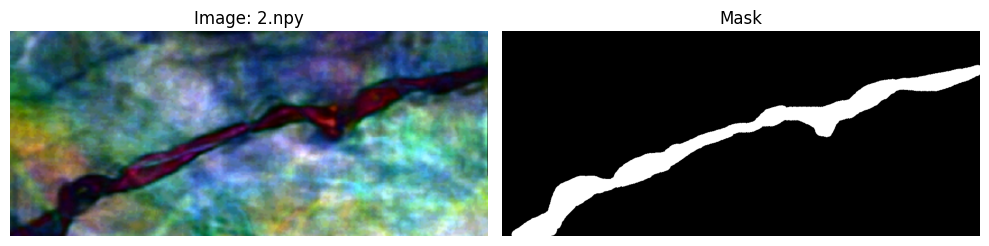

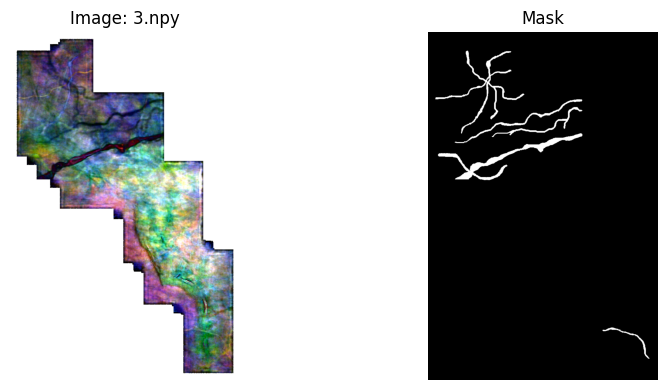

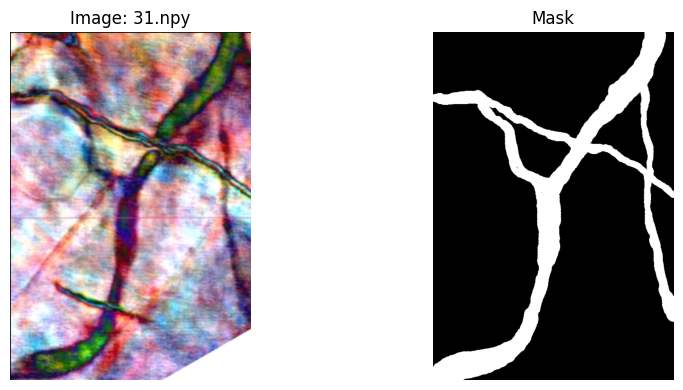

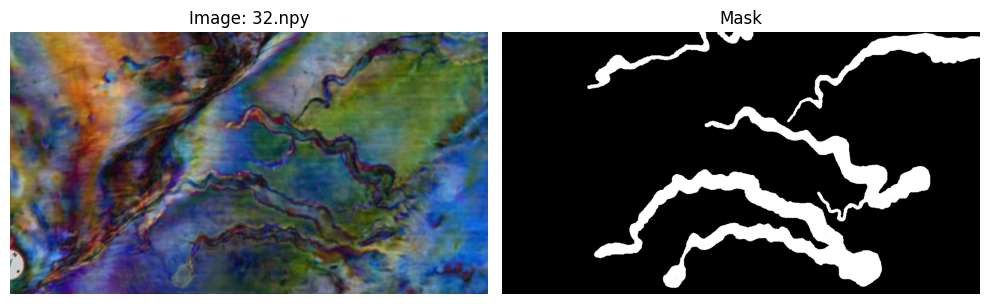

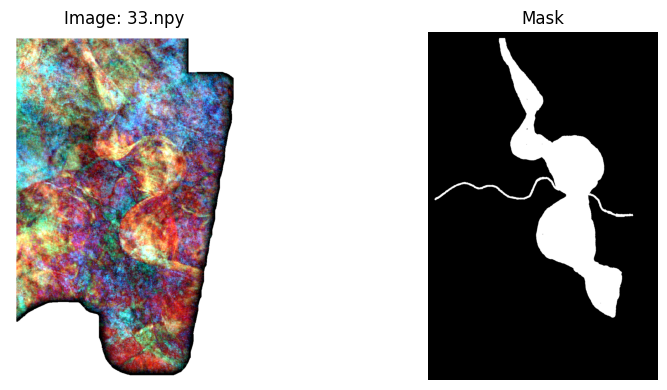

In [17]:
# images_dir = "../data/vessels/images"
# masks_dir = "../data/vessels/masks"

images_dir = "/home/ilya/Documents/IT-Geo-Paleochannel/data/raw/val/images"
masks_dir = "/home/ilya/Documents/IT-Geo-Paleochannel/data/raw/val/masks"


image_files = sorted([
    f for f in os.listdir(images_dir)
    if f.endswith(".npy")
])

for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] нет маски для {fname}")
        continue

    image = np.load(img_path)
    mask = np.load(mask_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(f"Image: {fname}")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [18]:
for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    image = np.load(img_path)
    mask = np.load(mask_path)

    print(f'{image.shape[0]}, {image.shape[1]}')


442, 1032
1034, 682
787, 544
700, 1275
1098, 724


In [19]:
import os
import cv2
import numpy as np

IMG_DIR = images_dir
MASK_DIR = masks_dir

OUT_IMG_DIR = "/home/ilya/Documents/IT-Geo-Paleochannel/data/padded_1024/val/images"
OUT_MASK_DIR = "/home/ilya/Documents/IT-Geo-Paleochannel/data/padded_1024/val/masks"

os.makedirs(OUT_IMG_DIR, exist_ok=True)
os.makedirs(OUT_MASK_DIR, exist_ok=True)

TARGET = 1024

def resize_and_pad(img, target=1024, is_mask=False):
    if is_mask:
        h, w = img.shape
    else:
        h, w, c = img.shape

    scale = min(target / h, target / w)
    new_h, new_w = int(h * scale), int(w * scale)

    interp = cv2.INTER_NEAREST if is_mask else cv2.INTER_LINEAR
    img_resized = cv2.resize(img, (new_w, new_h), interpolation=interp)

    if is_mask:
        canvas = np.zeros((target, target), dtype=img.dtype)
    else:
        canvas = np.ones((target, target, img.shape[2]), dtype=img.dtype) * 255

    top = (target - new_h) // 2
    left = (target - new_w) // 2

    canvas[top:top+new_h, left:left+new_w] = img_resized
    return canvas


files = sorted(f for f in os.listdir(IMG_DIR) if f.endswith(".npy"))

for fname in files:
    img_path = os.path.join(IMG_DIR, fname)
    mask_path = os.path.join(MASK_DIR, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] {fname} — нет маски")
        continue

    img = np.load(img_path)
    mask = np.load(mask_path)

    img_out = resize_and_pad(img, TARGET, is_mask=False)
    mask_out = resize_and_pad(mask, TARGET, is_mask=True)

    np.save(os.path.join(OUT_IMG_DIR, fname), img_out)
    np.save(os.path.join(OUT_MASK_DIR, fname), mask_out)

    print(f"[OK] {fname}: {img.shape} → {img_out.shape}")


[OK] 2.npy: (442, 1032, 3) → (1024, 1024, 3)
[OK] 3.npy: (1034, 682, 3) → (1024, 1024, 3)
[OK] 31.npy: (787, 544, 3) → (1024, 1024, 3)
[OK] 32.npy: (700, 1275, 3) → (1024, 1024, 3)
[OK] 33.npy: (1098, 724, 3) → (1024, 1024, 3)


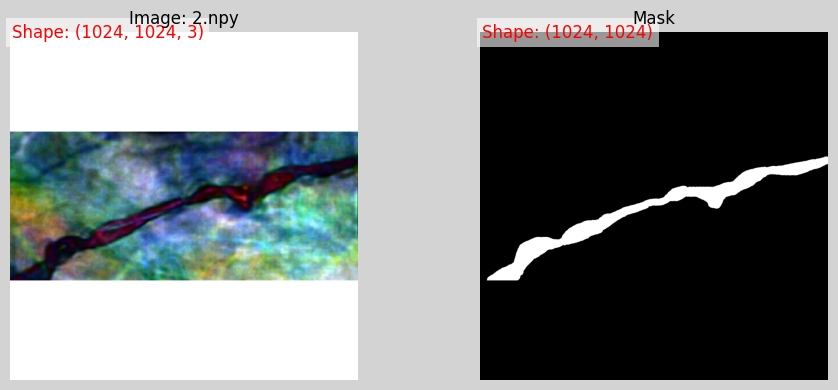

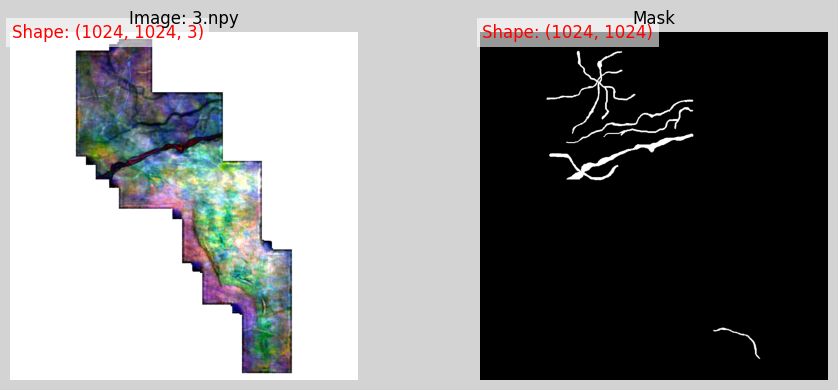

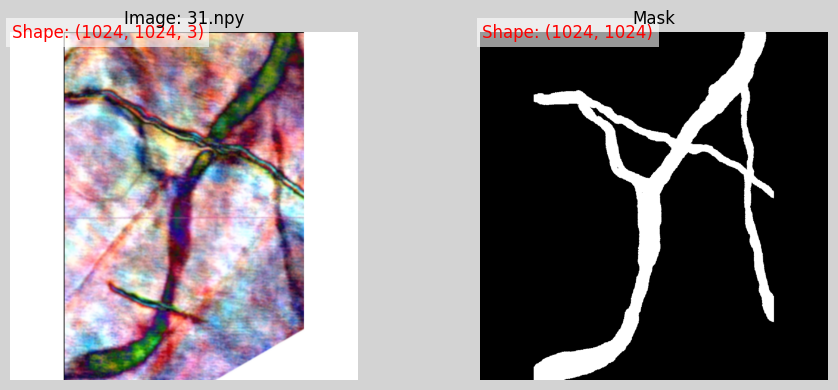

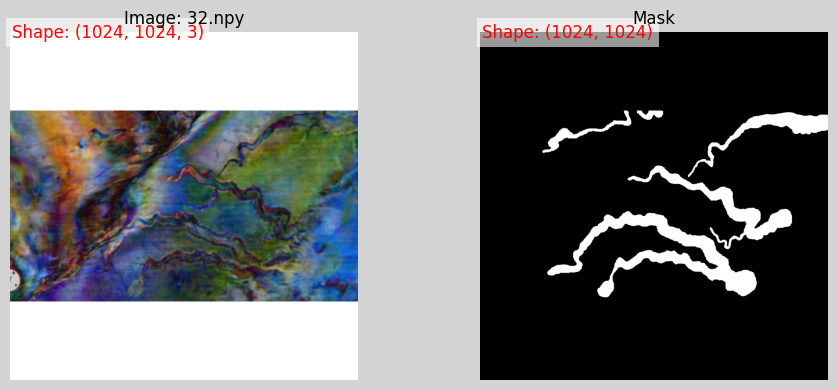

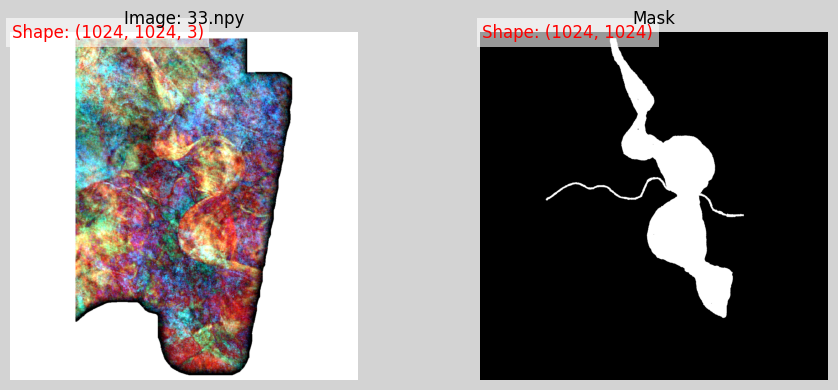

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

images_dir = "../data/padded_1024/val/images"
masks_dir = "../data/padded_1024/val/masks"

image_files = sorted([
    f for f in os.listdir(images_dir)
    if f.endswith(".npy")
])

for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] нет маски для {fname}")
        continue

    image = np.load(img_path)
    mask = np.load(mask_path)

    # Создаем figure с серым фоном
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), facecolor='lightgray')

    # Для изображения
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(f"Image: {fname}")
    axes[0].set_facecolor('lightgray')
    axes[0].axis("off")
    # Добавляем шейп прямо на картинку
    axes[0].text(5, 15, f"Shape: {image.shape}", color="red", fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # Для маски
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[1].set_facecolor('lightgray')
    axes[1].axis("off")
    axes[1].text(5, 15, f"Shape: {mask.shape}", color="red", fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    plt.tight_layout()
    plt.show()
